## Descripción del proyecto

En este proyecto abordaremos un caso de estudio para la empresa Zuber,  una nueva empresa de viajes compartidos que se está lanzando en Chicago, realizaremos un análisis exploratorio donde podremos obtener información acerca del estado del arte para el negocio de taxis, dentro de los datasets que estudiaremos, contamos con información como ; Flujo de viajes de las empresas prestadoras de servicios de taxi, información sobre el estado del tiempo (clima) conforme a los viajes realizados, la duración y destino de los mismos, así como la cantidad de viajes realizados para cada destino.


El propósito de este análisis es poder contar con información y conclusiones suficientes acerca de las preferencias de los pasajeros, el impacto de los factores externos en los viajes, así como el flujo que mantienen nuestros competidores actuales. Todo lo anterior enfocado a la creación de estrategias que nos permitan tener un ingreso exitoso al mercado y priorizar la eficiencia de recursos (humanos y económicos) para llevar a cabo nuestra estrategia de mercado.

## Descripción de los datos
Posterior a la consulta de datos mediante queries a la base de datos (PostgreSQL) obtuvimos los siguientes datasets:

**/datasets/project_sql_result_01.csv. contiene los siguientes datos:**

* company_name: nombre de la empresa de taxis

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 


**/datasets/project_sql_result_04.csv. contiene los siguientes datos:**
* dropoff_location_name: barrios de Chicago donde finalizaron los viajes
* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.


**/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:**

* start_ts: fecha y hora de la recogida
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
* duration_seconds: duración del viaje en segundos


## Importando Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# Importando Datasets

In [2]:
df_com = pd.read_csv('/datasets/project_sql_result_01.csv')
df_trip = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')


## Explorando Datasets


### Explorando el dataset company 'df_com'

In [3]:
#Explorando dataset company 'df_com'
print(df_com.info())
print()
print('---------')
print()
print(df_com.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

---------

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [4]:
#verificando si existen filas duplicadas
df_com.duplicated().any()

False

Podemos observar que tenemos dos columnas:
* 'company_name' tipo object que contiene el nombre de la compañía de taxis 
* 'trips_amount' tipo int64 que contiene la cantidad de viajes realizados por cada  compañía
* La cantidad media de viajes de todas las compañías es de 2145 , muy bajo en relación a la empresa que presenta más viajes con 19558
* Tenemos datos de 54 empresas que ofrecen servicios de taxi
* se tiene una desviación estandar alta, esto indica que la distribución de los datos es dispersa (campana más plana que alta)

*El dataset no contiene valores duplicados*

### Explorando el dataset trips 'df_trip'

In [5]:
#Explorando dataset trips 'df_trip'
print(df_trip.info())
print()
print('---------')
print()
print(df_trip.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

---------

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [6]:
#verificando si existen filas duplicadas
df_trip.duplicated().any()

False

Podemos observar que tenemos dos columnas:
* 'dropoff_location_name' tipo object que contiene el nombre del barrio donde los usuarios finalizan su viaje
* 'average_trips' tipo float64 que contiene la cantidad promedio de viajes realizados que terminaron en cada barrio (en noviembre de 2017)
* Se cuenta con el registro de 94 barrios
* la media de viajes por barrio es de 599, casi 18 veces por debajo de el barrio con más viajes (10,727)
* contamos con barrios que solo han registrado 1.8 viajes promedio 
* se tiene una desviación estandar  alta, esto indica que la distribución de los datos es dispersa (campana más plana que alta)

*El dataset no contiene valores duplicados*

### Explorando el dataset weather 'df_weather'

In [7]:
#Explorando dataset weather 'df_weather'
print(df_weather.info())
print()
print('---------')
print()
print(df_weather.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

---------

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


In [8]:
#verificando si existen filas duplicadas
df_weather[df_weather.duplicated()]

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [9]:
#Verificando un ejemplo de fila duplicada
df_weather[(df_weather['start_ts']=='2017-11-11 08:00:00') & (df_weather['weather_conditions']=='Good') & (df_weather['duration_seconds']==1260.0)]

,start_ts,weather_conditions,duration_seconds
116,2017-11-11 08:00:00,Good,1260.0
657,2017-11-11 08:00:00,Good,1260.0


Podemos observar que tenemos tres columnas:

* 'start_ts' tipo object que contiene la fecha y hora del viaje realizado
* 'weather_conditions' tipo object que contiene el estado del tiempo para el viaje realizado ('Good y Bad)
* 'duration_seconds' tipo float64 que contiene la duración en segundos del viaje realizado
* Contamos con 1068 registros de viajes
* La duración media de los viajes es de 2071 segundos, si bien es bajo en relación al dato máximo(7440), no está excesivamente bajo, lo podemos observar en la desviación estándar
* la desviación estandar es baja, por lo que esperamos que los datos estén más cercanos a la media y la curva de la distribución de los datos sea más cercana a la media (curva más alta que plana)


*El dataset contiene filas duplicadas, sin embargo esto es "aceptable" debido a que el dataset contiene datos sobre viajes desde el barrio Loop hasta el Aeropuerto internacional O'Hare, por lo tanto, es **posible** que 2 (o más) usuarios hayan tomado un taxi en la misma hora hacia el mismo destino*

## Preparando datos para el análisis (normalización de datos)

### Transformando la columna 'start_ts' de object a datetime para el dataframe 'df_weather'

In [10]:
# Cambiando el tipo de dato (object) de la columna start_ts por tipo de dato (date)
df_weather['start_ts']=pd.to_datetime(df_weather['start_ts'],format='%Y-%m-%dT%H:%M:%S')

print(df_weather.info())
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## Análisis exploratorio de los datos

### Identificando las 10 principales empresas prestadoras de servicio de Taxi

In [11]:
top_company=df_com.sort_values(by ='trips_amount',ascending =False).head(10)
top_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [12]:
#Calculando que porcentaje representan las 3 empresas con mayor cantidad de viajes, sobre el total de viajes
top1_percentage =round((top_company[top_company['company_name'].isin(['Flash Cab'])].sum()[1] * 100 )/top_company.sum()[1],2)
top3_percentage=round((top_company[top_company['company_name'].isin(['Flash Cab','Taxi Affiliation Services','Medallion Leasing'])].sum()[1] * 100 )/top_company.sum()[1],2)

print(f"Las empresa Flash Cab representa el {top1_percentage}% del total de viajes")
print()
print(f"Las empresas Flash Cab, Taxi Affiliation Services y Medallion Leasing Representan el {top3_percentage}% del total de viajes")

Las empresa Flash Cab representa el 19.7% del total de viajes

Las empresas Flash Cab, Taxi Affiliation Services y Medallion Leasing Representan el 41.65% del total de viajes


Text(0.5, 1.0, 'Top 10 cab companies by trips amount')

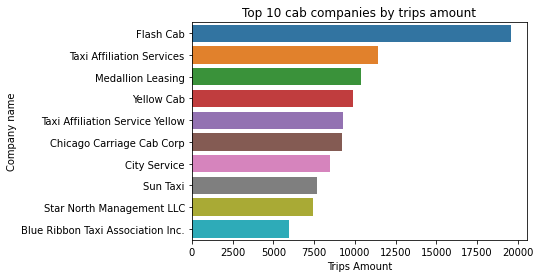

In [13]:
#Generando un gráfico de barras para comparar las compañias top 10 conforme a los viajes realizados
sns.barplot(data=top_company, x='trips_amount',y='company_name')
plt.xlabel('Trips Amount')
plt.ylabel('Company name')
plt.title('Top 10 cab companies by trips amount')

**Podemos observar que:**
* La empresa Flash Cab tiene la supremacía en los viajes con 19,558 viajes, superando casi al doble a su rival inmediato Taxi Affiliation Services.
* Flash Cab por sí solo abarca el 19.7% del total de los viajes 
* Las empresas Flash Cab, Taxi Affiliation Services y Medallion Leasing Representan el 41.65% del total de viajes


### Identificando los 10 principales barrios en términos de finalización

In [14]:
top_drop=df_trip.sort_values(by ='average_trips',ascending =False).head(10)
top_drop

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [15]:
#Calculando que porcentaje del total de viajes representan los 2 barrios más importantes en términos de finalización
top2_percentage=round((top_drop[top_drop['dropoff_location_name'].isin(['Loop','River North'])].sum()[1] * 100 )/top_drop.sum()[1],2)
print(f"Los destinos Loop y River North representan un {top2_percentage}% del total de viajes")

Los destinos Loop y River North representan un 46.82% del total de viajes


Text(0.5, 1.0, 'Top 10 neighboorhoods by drop off')

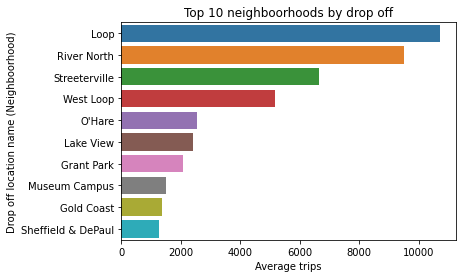

In [16]:
#Graficando los 10 destinos más relevantes para los usuarios
sns.barplot(data=top_drop,x='average_trips',y='dropoff_location_name')
plt.xlabel('Average trips')
plt.ylabel('Drop off location name (Neighboorhood)')
plt.title('Top 10 neighboorhoods by drop off')


**Podemos observar que:**
* Loop es el destino más frecuente en donde los usuarios terminan sus viajes, con cerca de 107 mil viajes
* Loop y River North son los destinos más comunes en donde los usuarios terminan sus viajes, solamente estos dos destinos representan el 46.82% del total de los viajes


### Analizando los datos sobre el estado del tiempo (clima)

In [17]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [18]:
#Realizando la cuenta de la cantidad de viajes con buen y mal clima
weather_count= df_weather.groupby('weather_conditions').count().reset_index().rename(columns={'start_ts':'count'})
weather_count

,weather_conditions,count,duration_seconds
0,Bad,180,180
1,Good,888,888


Text(0, 0.5, 'Quantity of trips')

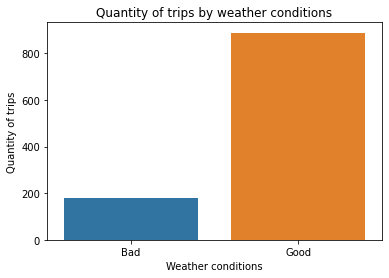

In [19]:
#Graficando la cantidad de viajes con buen y mal clima
sns.barplot(data=weather_count, x='weather_conditions',y='count')
plt.title('Quantity of trips by weather conditions')
plt.xlabel('Weather conditions')
plt.ylabel('Quantity of trips')

Text(0.5, 1.0, 'Distribution of trip duration by weather conditions')

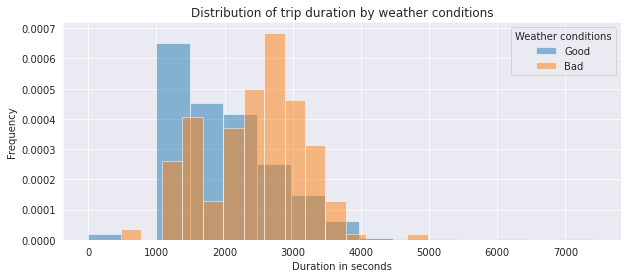

In [20]:
#Creando un histograma para verificar la distribución de la duración de viajes conforme al estado del clima
plt.figure(figsize=[10,4])
sns.set_style('darkgrid')
series_good=df_weather[df_weather['weather_conditions']=='Good']['duration_seconds']
series_bad=df_weather[df_weather['weather_conditions']=='Bad']['duration_seconds']


series_good.hist(ax=plt.gca(),density=True, alpha=.5, bins=15, edgecolor='white', legend=True)
series_bad.hist(ax=plt.gca(),density=True, alpha=.5, bins=15, edgecolor='white', legend=True)

plt.ylabel('Frequency')
plt.xlabel('Duration in seconds')
plt.legend(['Good','Bad'],title='Weather conditions')
plt.title('Distribution of trip duration by weather conditions')

#sns.histplot(x='Good', data=df_weather)

In [21]:
#Calculando la duración promedio (en minutos) de los viajes por condición de clima
good_mean=round((series_good.mean()/60),2)
bad_mean=round((series_bad.mean()/60),2)

print(f'La duración promedio para un viaje con buenas condiciones de clima es: {good_mean} minutos')
print()
print(f'La duración promedio para un viaje con malas condiciones de clima es: {bad_mean} minutos')

La duración promedio para un viaje con buenas condiciones de clima es: 33.33 minutos

La duración promedio para un viaje con malas condiciones de clima es: 40.45 minutos


Podemos observar que:
* Aproximadamente un 22% de los viajes se realizaron con mal clima, el resto (78%) tuvieron buenas condiciones climatológicas
* La distribución de la duración en segundos de los viajes nos arroja un sesgo a la izquierda para los viajes con malas condiciones climatológicas, y un sesgo a la derecha para los viajes con buenas condiciones climatológicas
* La duración promedio para un viaje con buenas condiciones de clima es: 40.45 minutos
* La duración promedio para un viaje con malas condiciones de clima es: 33.33 minutos

Sería interesante verificar si estos cerca de 7 minutos de diferencia entre un viaje con buen o mal clima son significativas, en este momento no podemos saberlo a ciencia cierta debido a que no tenemos datos sobre las distancias recorridas, tal vez 7 minutos de diferencia en un viaje de más de una hora no es tan considerable, sin embargo si lo comparamos con un viaje de 10 minutos, puede arrojar una diferencia significativa.


con la información que contamos, probemos una hipótesis.

## Probando hipótesis

### La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare cambia los sábados lluviosos

In [22]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
#Añadiendo la columna dow (Day of Week) 
#El día 5 es sábado, debido a que el índice comienza en: Lunes = 0
df_weather['dow']=df_weather['start_ts'].dt.dayofweek
df_weather.dow.unique()

##Nota: Observamos que todos los días del dataset son sábado
#no retiramos esta columna creada debido a que considero una buena práctica corroborar la fiabilidad de los datos

array([5])

In [24]:
#Calculando la varianza de la duración de viajes dependiendo el clima
print("Varianza de la duración de viajes en clima bueno: ",np.var(series_good))
print("Varianza de la duración de viajes en clima malo: ",np.var(series_bad))

Varianza de la duración de viajes en clima bueno:  575732.9308497686
Varianza de la duración de viajes en clima malo:  517403.56330246915


### Realizando test Levene para corroborar la igualdad de las varianzas

In [25]:
res = st.levene(series_good, series_bad)
#res.statistic
print('El valor p para la prueba de Levene es =',res.pvalue)

El valor p para la prueba de Levene es = 0.5332038671974493


**Utilizando la prueba de Levene corroboramos la igualdad de las varianzas, esta prueba establece que:**
* Si el valor p de la prueba de Levene es mayor a .05 entonces las varianzas no son significativamente diferentes entre ellas
* Si el valor p de la prueba de Levene es menor a .05 entonces las varianzas si son significativamente diferentes entre ellas

El valor p para la prueba de Levene fue de 0.533 , por lo tanto establecemos que las varianzas no son significativamente diferentes entre si, por lo tanto utilizaremos el parámetro **'equal_var = True'** para la prueba de hipótesis

In [26]:
#utilizamos la prueba estadística: Hipótesis sobre la igualdad de las medias de dos poblaciones

alpha=.05
results= st.ttest_ind(series_good,series_bad, equal_var=True)

pvalue=f'{results.pvalue/2:.15f}'
print('valor p: ',pvalue)

if results.pvalue/2 < alpha:
    print('Rechazamos la hipótesis nula')
    
else:
    print('No rechazamos la hipótesis nula')

valor p:  0.000000000003259
Rechazamos la hipótesis nula


Podemos observar que
* La duración promedio para un viaje con buenas condiciones de clima es: 40.45 minutos
* La duración promedio para un viaje con malas condiciones de clima es: 33.33 minutos

Planteamiento de hipótesis:
* Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare son iguales los sábados lluviosos (contra los no lluviosos)
* Hipótesis alternativa: Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare cambia los sábados lluviosos


Utilizando la prueba de hipótesis : "Hipótesis sobre la igualdad de las medias de dos poblaciones" observamos que el valor p es de 0.000000000003259 por lo tanto:

* Se rechaza la hipótesis Nula, por lo tanto, la duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare **SI** cambia los sábados lluviosos
* No se tiene evidencia suficiente para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropouerto internacional O'Hare en días lluviosos son iguales


Se establece un valor alpha de 0.05 por convención estadística

### Explicando como fue el planteamiento de hipótesis y que herramienta estadística se decidió utilizar

La hipótesis nula se crea desde el planteamiento a probar, desafía el status quo, en cambio la hipótesis alternativa se plantea de manera opuesta a la hipótesis a probar, no desafía el status quo y no representa un cambio significativo.

La clave para crear ambas hipótesis está en el planteamiento, si deseamos comparar diferencia (Mayor que / Menor que) o si deseamos comparar igualdad (Diferente de) entre las dos medias a comparar, esto nos dará una pista de que tipo de prueba utilizar (una cola, dos colas, etc.)

* La hipótesis a probar es: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare cambia los sábados lluviosos" por lo tanto utilizamos la prueba de "Hipótesis sobre la igualdad de las medias de dos poblaciones"

* La prueba de "Hipótesis sobre la igualdad de las medias de dos poblaciones" nos ofrece la posibilidad de saber la probabilidad de que las medias de las poblaciones sean iguales (Hipótesis Nula Ho) o diferentes (Hipótesis alternativa H1)

**Se complementó la prueba de hipótesis con la comprobación de la igualdad de las varianzas mediante la prueba de Levene, la cual establece:**

* Si el valor p de la prueba de Levene es mayor a .05 entonces las varianzas no son significativamente diferentes entre ellas
* Si el valor p de la prueba de Levene es menor a .05 entonces las varianzas si son significativamente diferentes entre ellas

El valor p para la prueba de Levene fue de 0.533 , por lo tanto establecemos que las varianzas no son significativamente diferentes entre si, por lo tanto utilizaremos el parámetro **'equal_var = True'** para la prueba de hipótesis


## Conclusiones

Podemos observar que

**Referente a las empresas prestadoras de servicios de taxi:**
* La empresa Flash Cab tiene la supremacía en los viajes con 19,558 viajes, superando casi al doble a su rival inmediato Taxi Affiliation Services.
* Flash Cab por sí solo abarca el 19.7% del total de los viajes 
* Las empresas Flash Cab, Taxi Affiliation Services y Medallion Leasing Representan el 41.65% del total de viajes

**Referente a los destinos donde los usuarios finalizan sus viajes:**
* Loop es el destino más frecuente en donde los usuarios terminan sus viajes, con cerca de 107 mil viajes
* Loop y River North son los destinos más comunes en donde los usuarios terminan sus viajes, solamente estos dos destinos representan el 46.82% del total de los viajes


**Referente al clima que se presentó en los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare (los días Sábado)**

* Aproximadamente un 22% de los viajes se realizaron con mal clima, el resto (78%) tuvieron buenas condiciones climatológicas
* La distribución de la duración en segundos de los viajes nos arroja un sesgo a la izquierda para los viajes con malas condiciones climatológicas, y un sesgo a la derecha para los viajes con buenas condiciones climatológicas
* La duración promedio para un viaje con buenas condiciones de clima es: 40.45 minutos
* La duración promedio para un viaje con malas condiciones de clima es: 33.33 minutos

Sería interesante verificar si estos cerca de 7 minutos de diferencia entre un viaje con buen o mal clima son significativas, en este momento no podemos saberlo a ciencia cierta debido a que no tenemos datos sobre las distancias recorridas, tal vez 7 minutos de diferencia en un viaje de más de una hora no es tan considerable, sin embargo si lo comparamos con un viaje de 10 minutos, puede arrojar una diferencia significativa.



**Concluimos con la hipótesis presentada:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare cambia los sábados lluviosos".**

Utilizando la prueba de hipótesis : "Hipótesis sobre la igualdad de las medias de dos poblaciones" observamos que el valor p es de 0.000000000003369 por lo tanto:

* Se rechaza la hipótesis Nula, por lo tanto, la duración promedio de los viajes desde el Loop hasta el Aeropuerto internacional O'Hare **SI** cambia los sábados lluviosos
* No se tiene evidencia suficiente para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropouerto internacional O'Hare en días lluviosos son iguales



## Estudio eliminando Outliers

### Eliminando outliers  de los datos para la prueba de hipótesis

#### Trabajando con el objeto series_good (datos sobre clima: bueno)

In [27]:
#Comprobando el tamaño inicial del objeto series_good
print(len(series_good))

888


In [28]:
#calculando quartiles e IQR
sg_q1=series_good.quantile(.25)
sg_q3=series_good.quantile(.75)
iqr_g=sg_q3-sg_q1
print('Rango intercuartílico =',iqr_g)
print()

#mínimos y máximos
lf_g=sg_q3 - (1.5*iqr_g)
uf_g=sg_q3 + (1.5*iqr_g)
print('Mínimo = ', lf_g)
print('Máximo = ',uf_g)

print('Los valores mínimos y máximos nos permiten definir los valores atípicos (outliers),  que serán todos aquellos que se encuentren debajo del mínimo o arriba del máximo')

Rango intercuartílico = 1070.25

Mínimo =  854.625
Máximo =  4065.375
Los valores mínimos y máximos nos permiten definir los valores atípicos (outliers),  que serán todos aquellos que se encuentren debajo del mínimo o arriba del máximo


In [29]:
#eliminando outliers
series_good2=series_good[(series_good>lf_g)  & (series_good<uf_g)]
series_good2.describe()

count     874.000000
mean     1994.361556
std       681.004539
min      1018.000000
25%      1397.250000
50%      1800.000000
75%      2460.000000
max      3982.000000
Name: duration_seconds, dtype: float64

**Podemos observar que la serie cambio de tener 888 valores, ahora tiene 874, los outliers fueron eliminados.**

#### Trabajando con el objeto series_bad (datos sobre clima: malo)

In [30]:
#Comprobando el tamaño inicial del objeto series_bad
print(len(series_bad))

180


In [31]:
#calculando quartiles e IQR
sb_q1=series_bad.quantile(.25)
sb_q3=series_bad.quantile(.75)
iqr_b=sb_q3-sb_q1
print('Rango intercuartílico =',iqr_b)
print()

#mínimos y máximos
lf_b=sb_q3 - (1.5*iqr_b)
uf_b=sb_q3 + (1.5*iqr_b)
print('Mínimo = ', lf_b)
print('Máximo = ',uf_b)

print('Los valores mínimos y máximos nos permiten definir los valores atípicos (outliers),  que serán todos aquellos que se encuentren debajo del mínimo o arriba del máximo')


Rango intercuartílico = 966.0

Mínimo =  1479.0
Máximo =  4377.0
Los valores mínimos y máximos nos permiten definir los valores atípicos (outliers),  que serán todos aquellos que se encuentren debajo del mínimo o arriba del máximo


In [34]:
#eliminando outliers
series_bad2=series_bad[(series_bad>lf_b)  & (series_bad<uf_b)]
series_bad2.describe()

count     156.000000
mean     2583.692308
std       566.388908
min      1483.000000
25%      2220.000000
50%      2593.000000
75%      2972.000000
max      4044.000000
Name: duration_seconds, dtype: float64

**Podemos observar que la serie cambio de tener 180 valores, ahora tiene 156, los outliers fueron eliminados.**

### Calculando nuevamente las varianzas para ambo objetos serie una vez eliminados los outliers

In [35]:
print("Varianza de la duración de viajes en clima bueno: ",np.var(series_good2))
print("Varianza de la duración de viajes en clima malo: ",np.var(series_bad2))

Varianza de la duración de viajes en clima bueno:  463236.55577606836
Varianza de la duración de viajes en clima malo:  318740.00788954634


In [36]:
res = st.levene(series_good2, series_bad2)
res.pvalue

0.0011015401815727807

**Utilizando la prueba de Levene corroboramos la igualdad de las varianzas, esta prueba establece que:**
* Si el valor p de la prueba de Levene es mayor a .05 entonces las varianzas no son significativamente diferentes entre ellas
* Si el valor p de la prueba de Levene es menor a .05 entonces las varianzas si son significativamente diferentes entre ellas

El valor p para la prueba de Levene fue de 0.0011 , por lo tanto establecemos que las varianzas no son significativamente diferentes entre si, por lo tanto utilizaremos el parámetro **'equal_var = True'** para la prueba de hipótesis

In [37]:
#utilizamos la prueba estadística: Hipótesis sobre la igualdad de las medias de dos poblaciones

alpha=.05
results= st.ttest_ind(series_good2,series_bad2, equal_var=True)

pvalue=f'{results.pvalue/2:.15f}'
print('valor p: ',pvalue)

if results.pvalue/2 < alpha:
    print('Rechazamos la hipótesis nula')
    
else:
    print('No rechazamos la hipótesis nula')


valor p:  0.000000000000000
Rechazamos la hipótesis nula


### Conclusión con eliminación de outliers

Mis conclusiones respecto a la hipótesis se habrían mantenido tal como las anteriores sin eliminar los outliers, sin embargo algo que debo resaltar es el valor p obtenido en la prueba estadística: "Hipótesis sobre la igualdad de las medias de dos poblaciones" , me da curiosidad que arroja 0.0 lo cual me hace concluir que no existe una remota posibilidad de que los viajes al aeropuerto, en sábados lluviosos **sean iguales** a los que tienen clima bueno.


